--- First 5 Rows ---
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 no

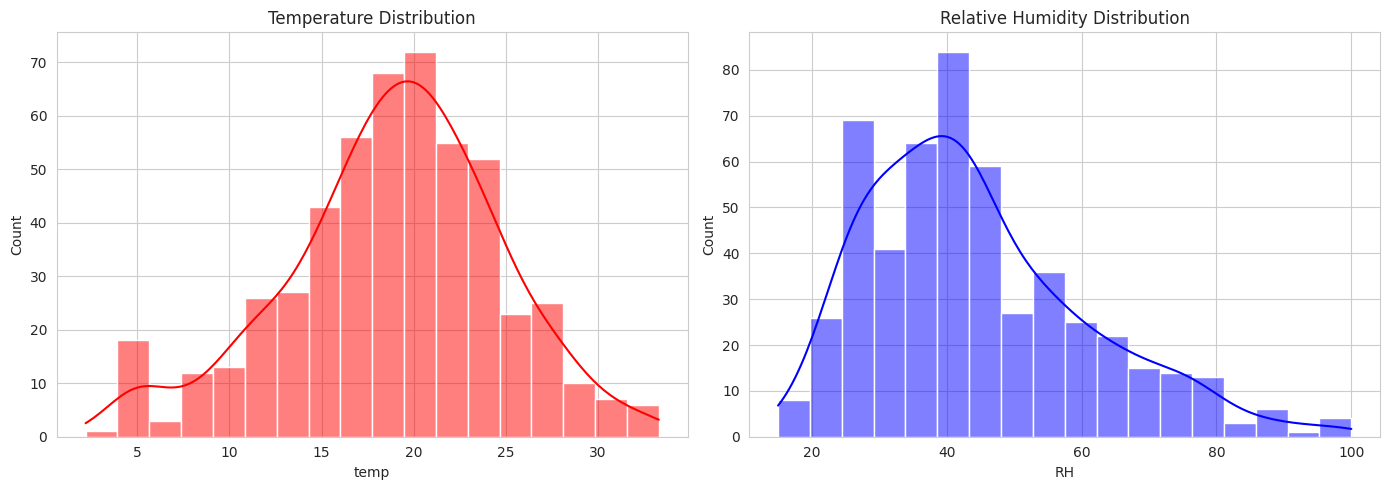

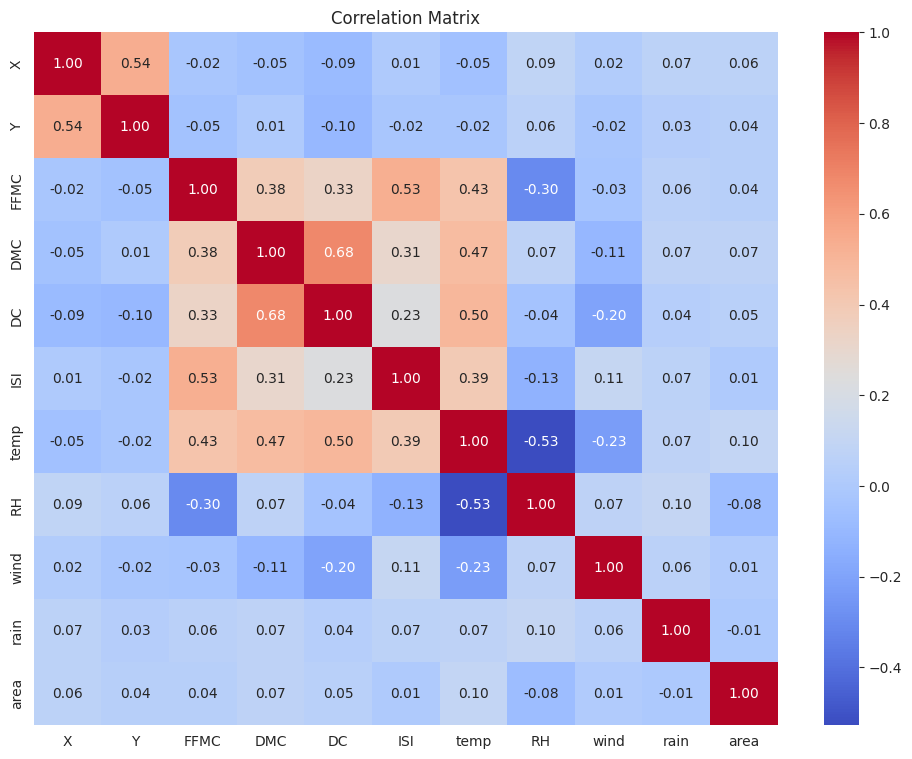


--- Transforming Target Variable ---


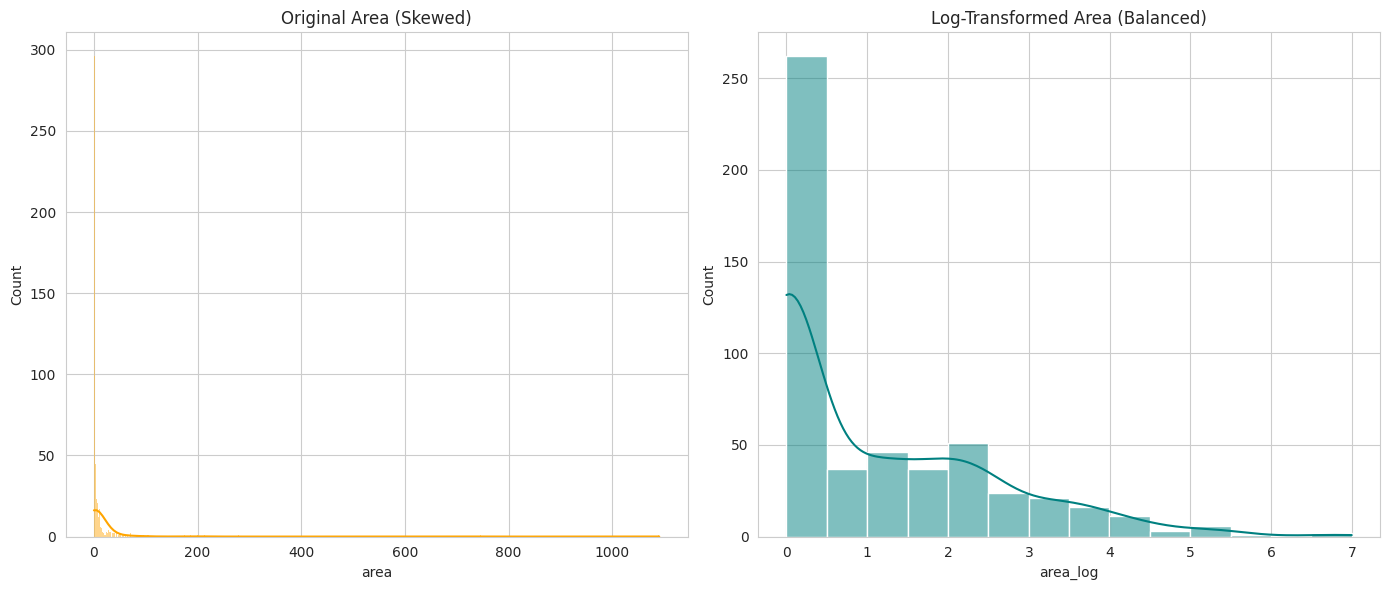


--- Final Selected Dataframe ---
   temp  RH  wind  ISI   DMC  area_log
0   8.2  51   6.7  5.1  26.2       0.0
1  18.0  33   0.9  6.7  35.4       0.0
2  14.6  33   1.3  6.7  43.7       0.0
3   8.3  97   4.0  9.0  33.3       0.0
4  11.4  99   1.8  9.6  51.3       0.0


In [7]:
# ==============================================================================
# FINAL SUBMISSION CODE FOR WEEK 2
# ==============================================================================

# --- PHASE 1: SETUP ---
# All tools are imported at the beginning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = '/content/drive/MyDrive/Colab Notebooks/forestfires.csv'
df = pd.read_csv(file_name, encoding='latin-1')
sns.set_style("whitegrid")


# --- PHASE 2: BASIC INSPECTION ---
print("--- First 5 Rows ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Statistical Summary ---")
print(df.describe())


# --- PHASE 3: VISUALIZATION (EDA) ---
print("\n--- Generating Visualizations ---")

# Histograms
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['temp'], kde=True, color='red').set_title('Temperature Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['RH'], kde=True, color='blue').set_title('Relative Humidity Distribution')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 9))
plt.title('Correlation Matrix')
# The fix is here: using only numerical data for correlation
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# --- PHASE 4: TRANSFORMATION & FEATURE SELECTION ---
print("\n--- Transforming Target Variable ---")

# Apply the log(1+x) transform to the 'area' column
df['area_log'] = np.log1p(df['area'])

# Visualize the effect of the transformation
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['area'], kde=True, color='orange').set_title('Original Area (Skewed)')
plt.subplot(1, 2, 2)
sns.histplot(df['area_log'], kde=True, color='teal').set_title('Log-Transformed Area (Balanced)')
plt.tight_layout()
plt.show()

# Select the final, most promising features
selected_features = ['temp', 'RH', 'wind', 'ISI', 'DMC', 'area_log']
final_df = df[selected_features]

print("\n--- Final Selected Dataframe ---")
print(final_df.head())